Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import  XGBRegressor
from sklearn import metrics

Data collection & analysis

In [42]:
df=pd.read_csv('/content/Train.csv')

In [43]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
df.shape

(8523, 12)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [46]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [53]:
avg=df['Item_Weight'].mean()
avg
df['Item_Weight'].fillna(avg,inplace=True)
df['Outlet_Size'].mode()
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [47]:
mode_outletsize=df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:x.mode([0])))
mode_outletsize

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [50]:
missingval=df['Outlet_Size'].isnull()
missingval

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [64]:
df.loc[missingval,'Outlet_Size']=df.loc[missingval,'Outlet_Type'].apply(lambda x:mode_outletsize)

In [65]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
sns.set()

<Figure size 600x600 with 0 Axes>

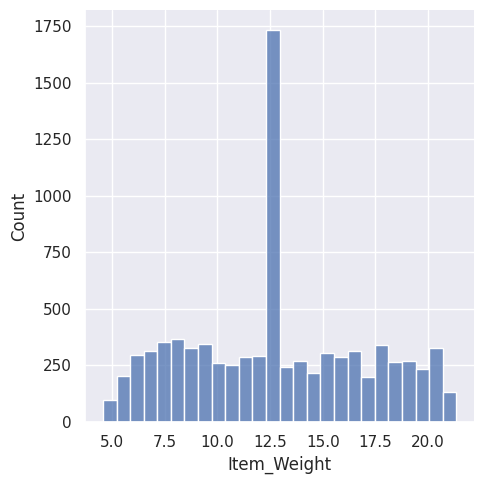

In [30]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

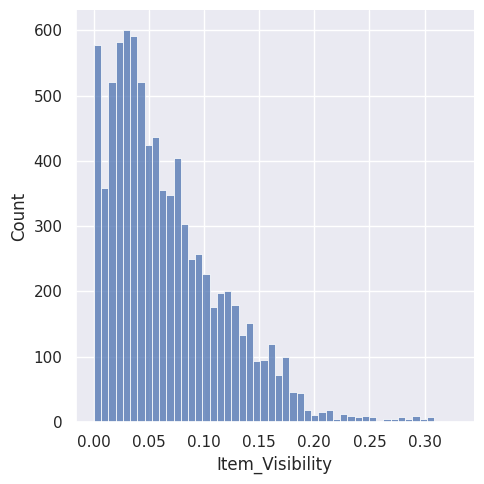

In [31]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

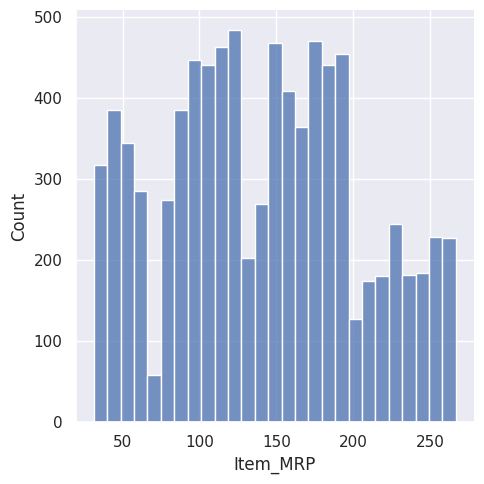

In [32]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

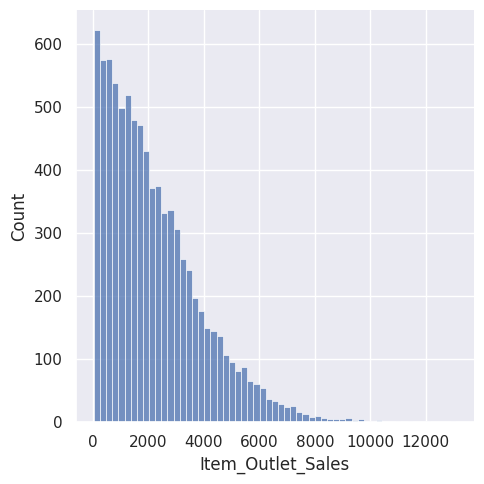

In [33]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_Outlet_Sales'])
plt.show()

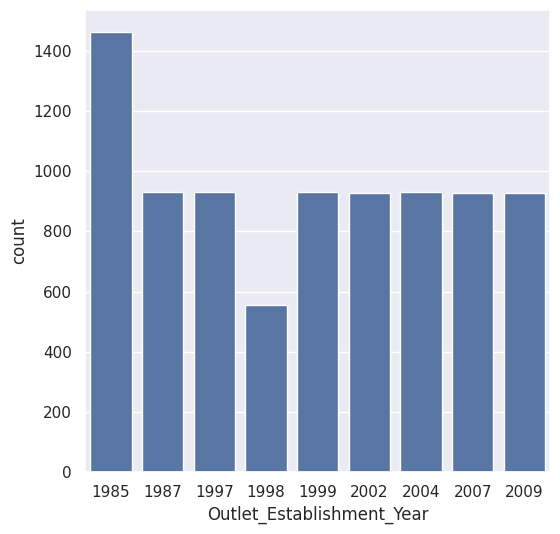

In [34]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=df)
plt.show()

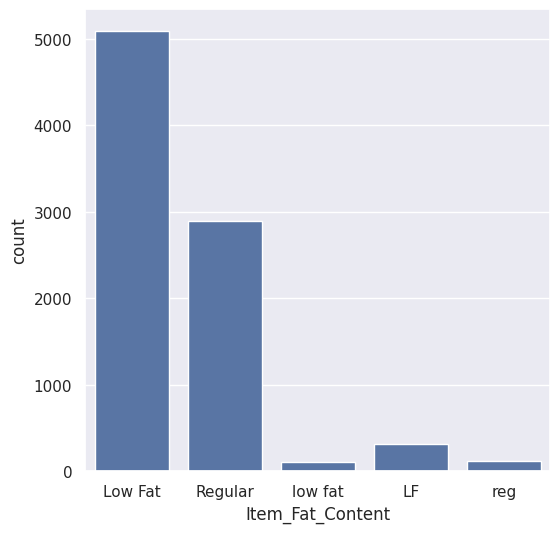

In [35]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=df)
plt.show()

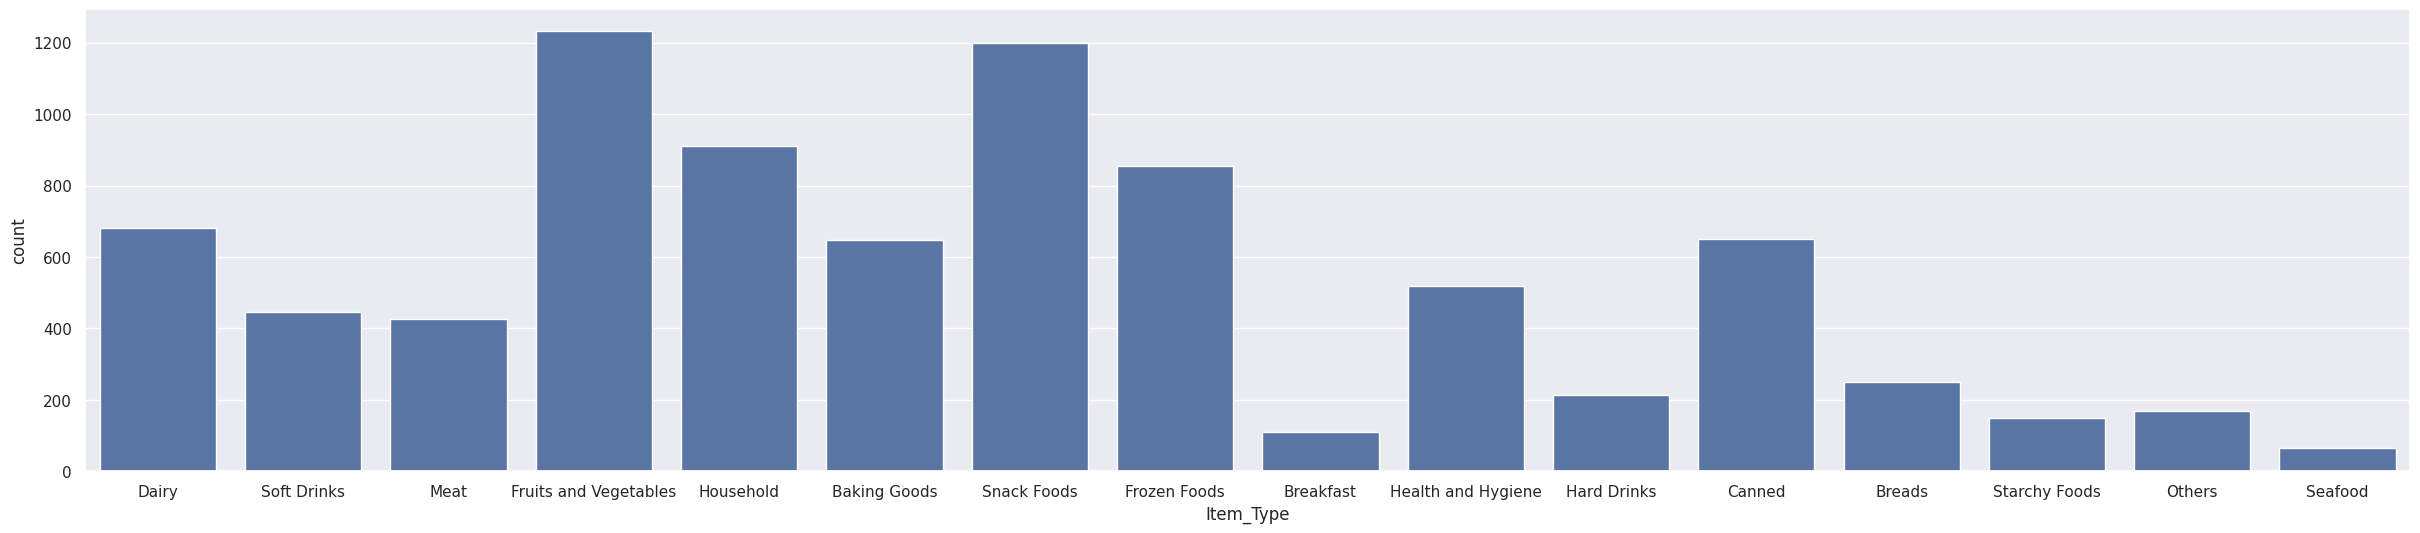

In [36]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=df)
plt.show()


In [55]:
df['Outlet_Size'].head()

0                                               Medium
1                                               Medium
2                                               Medium
3    Outlet_Type Grocery Store Supermarket Type1 Su...
4                                                 High
Name: Outlet_Size, dtype: object

In [66]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052


In [57]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [59]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','reg':'Regular'}},inplace=True)

In [60]:
df['Item_Fat_Content'].value_counts()

Low Fat    5201
Regular    3006
LF          316
Name: Item_Fat_Content, dtype: int64

In [61]:
encoder=LabelEncoder()

In [68]:
df['Item_Identifier']=encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content']=encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=encoder.fit_transform(df['Outlet_Identifier'])
#df['Outlet_Size']=encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=encoder.fit_transform(df['Outlet_Type'])


In [69]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,High,2,1,994.7052


In [74]:
newdf=df
newdf=newdf.drop('Outlet_Size',axis=1)


In [75]:
newdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,2,1,994.7052


In [76]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,High,2,1,994.7052


In [78]:
X=newdf.drop('Item_Outlet_Sales', axis=1)
Y=newdf['Item_Outlet_Sales']

In [79]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1999,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,1987,2,1
...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2009,2,2


In [81]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [91]:
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.2,random_state=2)

In [92]:
print(X.shape,xtrain.shape,xtest.shape)

(8523, 10) (6818, 10) (1705, 10)


Training the Model


In [93]:
regressor= XGBRegressor()

In [94]:
regressor.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation


In [95]:
#Train Data prediction
train_prediction=regressor.predict(xtrain)

In [96]:
r2_train=metrics.r2_score(ytrain,train_prediction)

In [97]:
print('R Squared Value= ', r2_train)

R Squared Value=  0.8748862360123904


In [98]:
#Test Data Prediction
test_prediction=regressor.predict(xtest)

In [99]:
r2_test=metrics.r2_score(ytest,test_prediction)

In [100]:
print('R Squared Value= ', r2_test)

R Squared Value=  0.5176638365577657
